In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV']

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-28 to 2019-06-28 - 69'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 0.4) & (stat['21-shrp'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
ITM,64,1.122081,0.424058,2.253030,0.438740
HYD,64,1.116523,0.432470,2.196352,0.409066
VTEB,64,0.986132,0.377763,2.169258,0.333713
MUB,64,0.959951,0.374971,2.115588,0.409122
CMF,64,0.997542,0.399898,2.077721,0.381602
PZA,64,1.147156,0.496110,1.976354,0.506035
TFI,64,1.008447,0.449989,1.870668,0.490727
IGIB,64,1.462299,0.799236,1.621090,0.594408
VCIT,64,1.475725,0.854107,1.532664,0.502684


In [26]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['ITM'] -1.3652823325543868 0.6 0.0877479859997807 2.2530303185541674
['ITM', 'IGIB'] -1.8362717539546156 -0.0025263279461672505 0.10331474889550976 1.9370601749039582
['VTEB', 'IGIB'] -1.8404447933806367 -0.03808278751076166 0.09281206356855046 1.8951740694384256
['MUB', 'IGIB'] -1.8997327380829359 -0.13174647011225782 0.10035297327188715 1.8683392412425652
['PZA', 'IGIB'] -1.9615120022049932 -0.27283414095229674 0.11004429331188784 1.7987221545645844


['PZA', 'IGIB']

In [27]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['PZA', 'IGIB'], sr=0)

['PZA', 'IGIB'] -0.1627898476404089 -0.27283414095229674 0.11004429331188784 1.7987221545645844
['PZA', 'IGIB', 'ITM', 'HYD'] -0.3161879498410107 0.38639962422990903 0.09741242592908032 2.01170653945453
['PZA', 'IGIB', 'ITM', 'VCIT'] -0.4704689392957393 0.22743774139130432 0.10209331931295644 1.845784570432305
['PZA', 'IGIB', 'ITM', 'VCLT'] -0.5005509182496873 0.17379968197910292 0.12564939977120979 1.809662726538035
['PZA', 'IGIB', 'VTEB', 'VCLT'] -0.5125675229850918 0.16703441990717818 0.12039805710773013 1.7887196738052684
['PZA', 'IGIB', 'MUB', 'VCLT'] -0.5333607442721977 0.14247074376840385 0.12416851195939846 1.7753022597073382


['PZA', 'IGIB', 'MUB', 'VCLT']

In [32]:
quote.setup_mask(['IGIB', 'MUB'])
quote.find_optimal_ratio(21, 1, .8)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'IGIB': 0.17, 'MUB': 0.63}, 0.8523, 0.2565)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.210102,0.358981,0.317932,1.054833,1.264251,1.436471,2.015665,2.906656,0.435823
MUB,64.0,0.959951,0.374971,0.256944,0.656386,0.910303,1.249943,1.685346,2.115588,0.409122
PZA,64.0,1.147156,0.496110,0.276890,0.724367,1.094088,1.548222,2.136537,1.976354,0.506035
IGIB,64.0,1.462299,0.799236,0.296551,0.766460,1.484765,1.918528,3.412148,1.621090,0.594408
VCLT,64.0,2.402976,1.610969,-0.024010,1.091163,2.272269,3.400312,6.202376,1.388176,0.973805


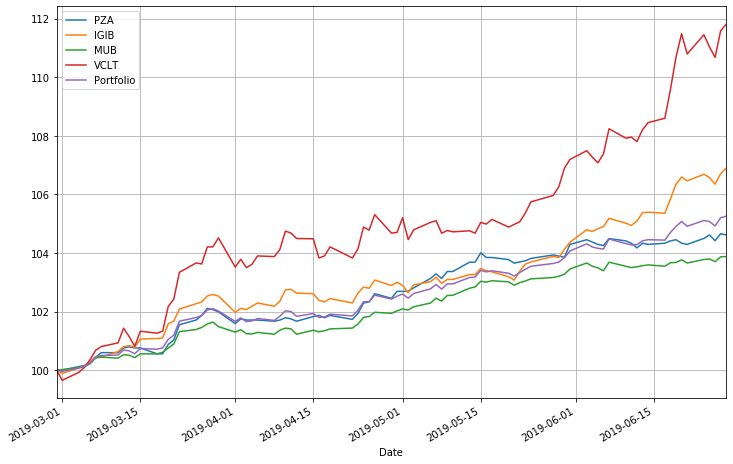

In [33]:
%pylab inline
quote.setup_mask(['PZA', 'IGIB', 'MUB', 'VCLT'])
quote.graph(21, {'PZA': .1, 'VCLT': .1, 'IGIB': 0.17, 'MUB': 0.63})